# 0319-0417 chatbot 聊天記錄分析
## 分成三個動作，從顧客移除自選股、新增自選股、以及查詢的狀況來討論。

In [1]:
import pandas as pd
df = pd.read_csv("/Users/lai/Desktop/test2.csv")

In [2]:
df1=df.head(362)

In [3]:
table=pd.DataFrame(df1)
csv_pd=table.to_csv('remove.csv')

# 第一部分

## 移除自選股、清理資料

In [4]:
dfaa = pd.read_csv("/Users/lai/Desktop/remove.csv")

In [5]:
user_id=[]
for i in dfaa['user_id']:
    user_id.append(i)

In [6]:
import re

In [7]:
message = []
for i in dfaa['message']:   
    message.append(re.split(',|，|；|-',i))
    

In [10]:
# for i in message:
#     del i[0]
for i in message:
    if '' in i:
        i.remove('')

In [ ]:
message

In [ ]:
len(user_id) == len(message)

In [11]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [ ]:
item_dict

In [12]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [ ]:
user

In [13]:

user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    
    

In [ ]:
user

In [14]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [ ]:
linestock

In [15]:
u=[]
from collections import Counter
for i in Counter(user_id):
    u.append(i)

In [ ]:
len(u)

In [ ]:
len(linestock)

In [ ]:
message

In [ ]:
item_dict

# 離散矩正

In [16]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,1536,1565,1762,1789,4142,2313,3217,3653,6278,2368,...,5244,5248,5277,6455,6489,6559,6729,8179,6192,2303
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Co-Occurrence Matrix

In [ ]:
item_dict

In [17]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       


In [ ]:
item_dict

In [18]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 2:
            co_occur_by_records.append([name, v, w]) 

In [20]:
co_occur_by_records

[['2313', '3481', 3],
 ['3653', '3481', 3],
 ['2368', '3481', 3],
 ['3481', '2313', 3],
 ['3481', '3653', 3],
 ['3481', '2368', 3],
 ['3481', '3017', 3],
 ['3481', '4935', 3],
 ['3481', '3338', 3],
 ['3481', '6147', 3],
 ['3481', '8358', 3],
 ['3481', '2499', 4],
 ['3481', '3673', 4],
 ['3481', '6164', 4],
 ['3481', '5349', 4],
 ['3017', '3481', 3],
 ['3017', '6153', 3],
 ['8086', '3548', 3],
 ['8086', '', 3],
 ['4935', '3481', 3],
 ['4935', '3548', 3],
 ['4935', '', 3],
 ['3338', '3481', 3],
 ['5349', '2499', 4],
 ['5349', '3673', 4],
 ['5349', '6164', 4],
 ['5349', '3481', 4],
 ['2383', '6153', 3],
 ['2402', '6153', 3],
 ['6153', '2383', 3],
 ['6153', '2402', 3],
 ['6153', '3017', 3],
 ['6153', '6213', 3],
 ['6213', '6153', 3],
 ['6213', '6488', 6],
 ['2327', '3548', 3],
 ['2327', '', 3],
 ['3376', '3548', 3],
 ['3376', '', 3],
 ['3548', '2327', 3],
 ['3548', '3376', 3],
 ['3548', '4935', 3],
 ['3548', '4968', 3],
 ['3548', '6238', 3],
 ['3548', '6271', 3],
 ['3548', '6451', 6],
 ['3

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import codecs
import numpy as np

In [30]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,6164,5349,3376,6451,,3481,3548,2402,6213,3017,...,6271,6531,6488,4968,2313,2383,6147,6238,3653,2327
6164,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3376,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6451,NaN,NaN,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,NaN,NaN,3.0,6.0,NaN,NaN,9.0,NaN,NaN,NaN,...,3.0,3.0,NaN,3.0,NaN,NaN,NaN,3.0,NaN,3.0


# 共線圖

/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/lai/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


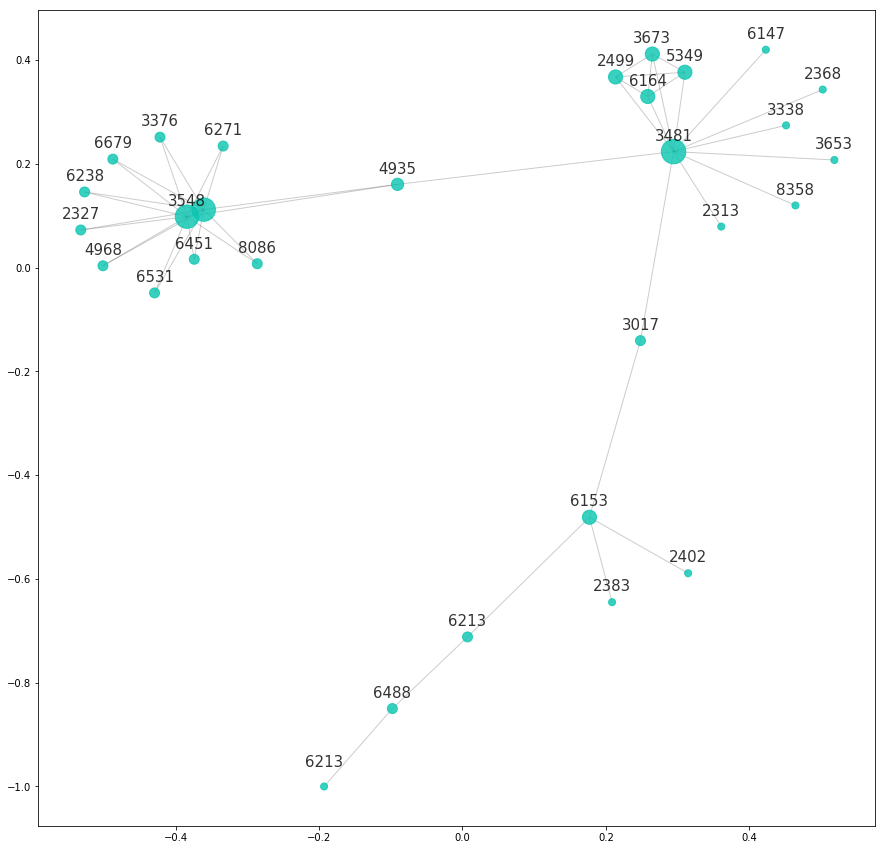

In [31]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.savefig("remove.png", dpi=100)
plt.show()

可以發現當顧客移除3481跟3548附加也會一起移除的股票，那就可以得知這些股票是相關聯的那推播時也能一併的推播

# 熱度圖

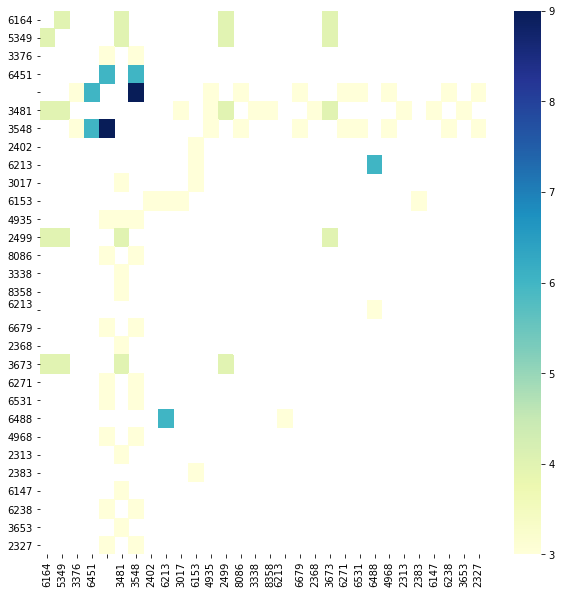

In [32]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# 第二部分

# 新增 動作

In [33]:
df2=df[395:1456]
table=pd.DataFrame(df2)
csv_pd=table.to_csv('remove1.csv')

In [34]:
dfbb = pd.read_csv("remove1.csv")

In [35]:
user_id=[]
for i in dfbb['user_id']:
    user_id.append(i)

In [36]:
import re

In [ ]:
dfbb['message']

In [37]:
message = []
for i in dfbb['message']:
    message.append(re.split(r'[;,+、＋]', i))

In [ ]:
message

In [38]:
for i in message:
    if '' in i:
        i.remove('')

In [ ]:
message

In [39]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [ ]:
item_dict

In [40]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [41]:
user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    

In [42]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [43]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,信紘科,0050,0056,00672L,08007,080070,1101,1102,1216,1301,...,臻鼎,興能高,興富發,優群,環球晶,鴻海,燿華,BRKB,M31,VHQ
317,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
637,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
418,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       




In [45]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 8:
            co_occur_by_records.append([name, v, w]) 

In [ ]:
len(co_occur_by_records)

In [ ]:
co_occur_by_records

In [46]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,3034,2330,3533,3105,1477,5347,6269,2454,2383,4966,...,2317,6147,3008,2379,6274,1301,2382,3711,3227,2891
3034,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2330,14.0,NaN,10.0,12.0,9.0,10.0,20.0,10.0,9.0,12.0,...,9.0,10.0,11.0,10.0,9.0,9.0,10.0,10.0,10.0,9.0
3533,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3105,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1477,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


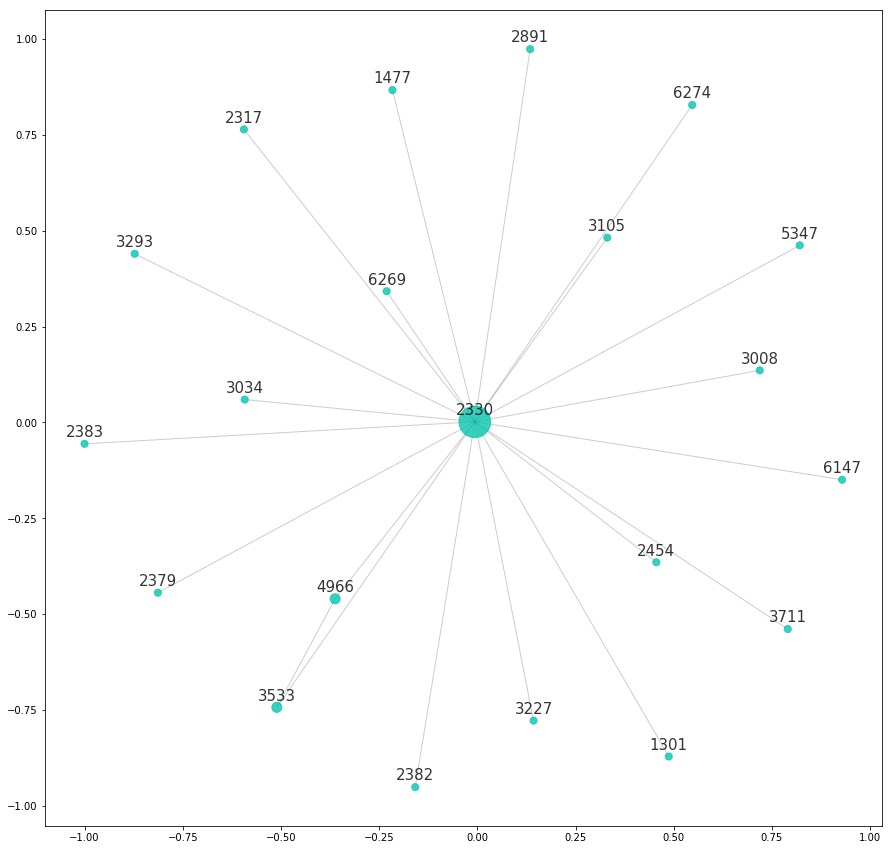

In [47]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.savefig("add.png", dpi=100)
plt.show()

此部份能看出，大部分顧客還是會比較在意2330的股市波動，也一併可以觀察到同時會在搜尋的股市方便推波做使用

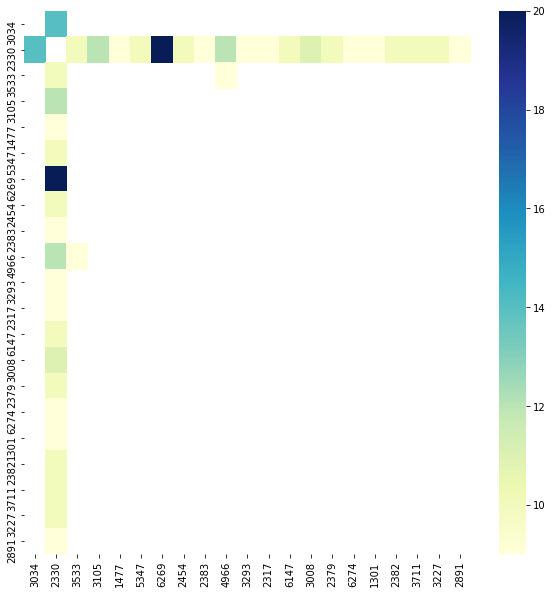

In [48]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')
#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()

# 查詢 動作

In [49]:
df3=df[1459:]
table=pd.DataFrame(df3)
csv_pd=table.to_csv('remove2.csv')

In [50]:
dfcc = pd.read_csv("remove2.csv")

In [51]:
user_id=[]
for i in dfcc['user_id']:
    user_id.append(i)


In [52]:
import re
message = []
for i in dfcc['message']:
    message.append(re.split(',|，|；|-',i))
for i in message:
    if '' in i:
        i.remove('')

In [ ]:
message

In [53]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

In [ ]:
item_dict

In [54]:
for item2 in item_dict: #每一個字詞
    item_dict[item2]={}
    user = 0
    for item1 in message:#每一個紀錄的股票代碼
        for term in item1:
            num=0
            if term == item2:
                num+=1
            if item_dict[item2].get(user_id[user]) == None:
                item_dict[item2][user_id[user]] = num 
            else:
                item_dict[item2][user_id[user]]+=num
        user+=1

In [55]:
user={}
for i in range(len(user_id)):
    
    if user.get(user_id[i]) == None:
        user[user_id[i]]=[]
        for item in message[i]:
            user[user_id[i]].append(item)
    else:
        for item in message[i]:
            user[user_id[i]].append(item)
    
    

In [56]:
linestock=[]
for i in user:
    linestock.append(user[i])

In [57]:
TDM = pd.DataFrame.from_dict(item_dict)
TDM.head()

,0050,0055,0056,0056 成分股,006208,00632R,00641R,00642U,00646,00648R,...,STOCKS,TELEGRAM 小幫手,TEST,TSK A,TSLA,TSMC,VIX,YANG,YINN,Z Z
828,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
826,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
759,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
465,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
item_dict={}
for i in message:
    for x in i:
        if item_dict.get(x) == None:
            item_dict[x] = {}

for line in linestock:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if item_dict[name1].get(name2) is None:     
                item_dict[name1][name2]= 1
            else:
                item_dict[name1][name2] = item_dict[name1][name2]+ 1       




In [ ]:
item_dict

In [59]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 12:
            co_occur_by_records.append([name, v, w]) 

In [60]:
len(co_occur_by_records)

86

In [61]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,6176,8103,2330,4736,9924,5522,1521,加權指數,4906,3008,...,2454,營收,445134,2317,525295,4735,8131,台積電,8044,4736營收
6176,NaN,40.0,44.0,NaN,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN
8103,40.0,NaN,110.0,NaN,NaN,160.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,130.0,NaN,NaN,NaN,NaN,NaN,NaN
2330,44.0,110.0,NaN,NaN,NaN,176.0,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,147.0,NaN,NaN,NaN,13.0,NaN,NaN
4736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13.0,NaN,NaN,13.0,13.0,NaN,NaN,13.0,13.0
9924,NaN,NaN,NaN,NaN,NaN,24.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


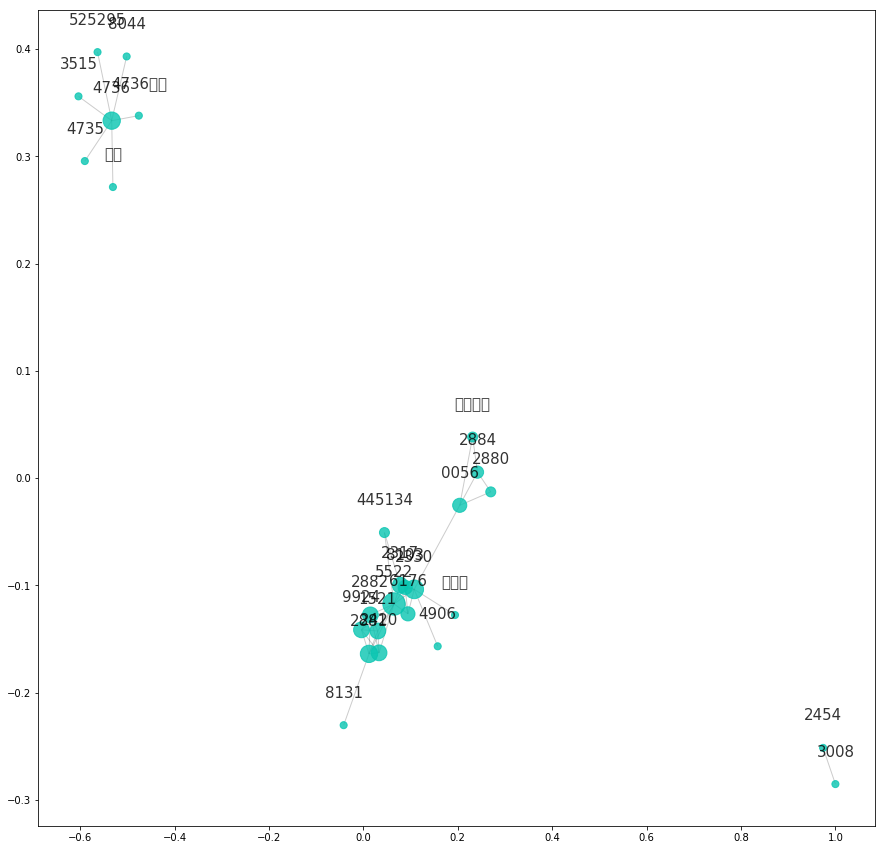

In [62]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.savefig("google.png", dpi=100)
plt.show()

當出現次數12次以上可以明顯看出，4736出現時4735\3515\8044 也會出現

In [63]:
co_occur_by_records=[]
for name,edges in item_dict.items():
    for v,w in edges.items():
        if w > 15:
            co_occur_by_records.append([name, v, w]) 

In [64]:
len(co_occur_by_records)

62

In [65]:
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]

/Users/lai/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


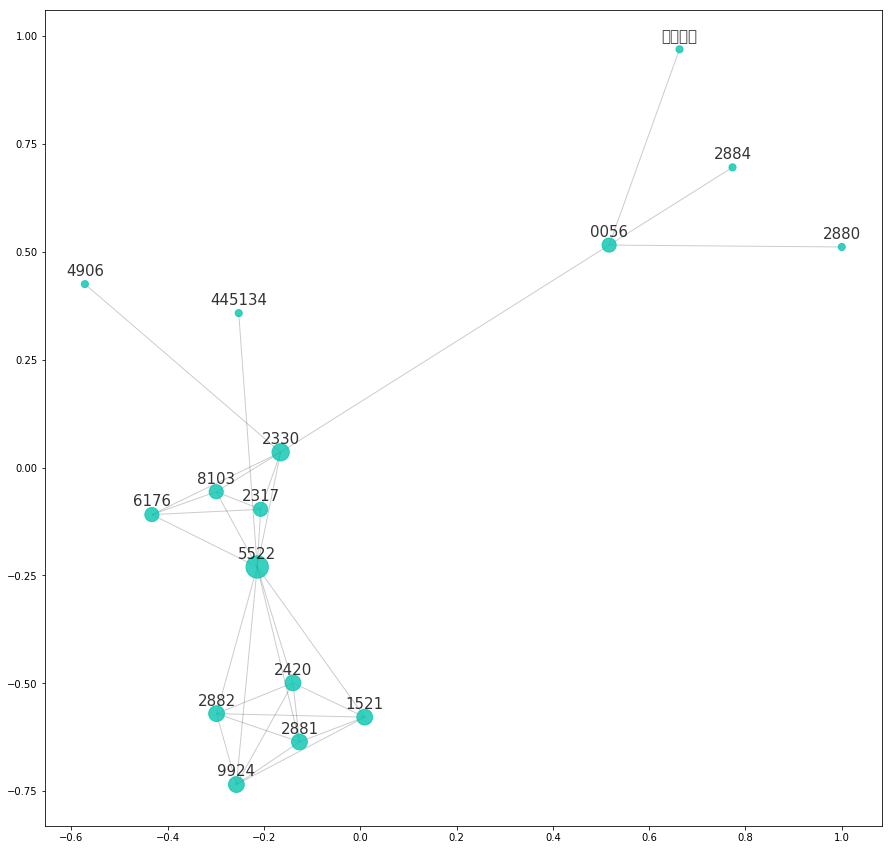

In [67]:
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['SimHei']   
plt.rcParams['font.family']='sans-serif'
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*50 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, node_color='b', alpha=0.2)
for p in pos:  # raise text positions
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.savefig("google15.png", dpi=100)
plt.show()

當改成超過15次以上，更能明顯看出查詢5522跟其他股票之間的關聯

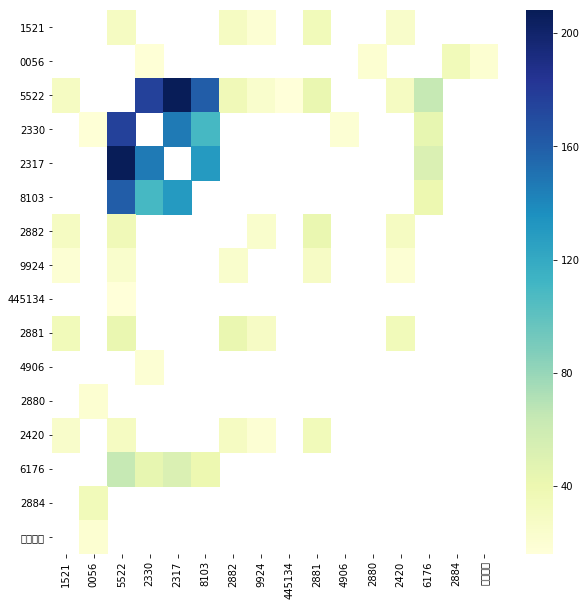

In [68]:
import seaborn as sn
plt.figure(figsize=(10,10))
sn.heatmap(co_occurrence_matrix_by_records,cmap='YlGnBu')

#plt.savefig("images/用詞熱度圖_以每筆通聯紀錄為一句.png", dpi=100)
plt.show()